# Genetic drift at a locus with two alleles

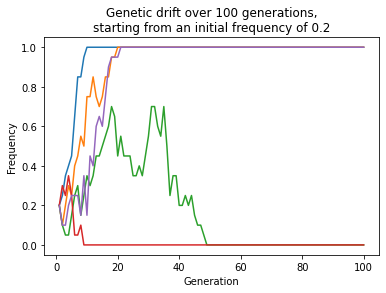

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
p = 0.2

np.random.seed(666)

f, ax = plt.subplots()

for pop in range(5):
    freqs = [p]
    for g in range(99):
        pn = np.random.binomial(N, freqs[-1], 1)[0]/N
        freqs.append(pn)
    ax.plot([i+1 for i in range(100)], freqs)
ax.set_xlabel("Generation")
ax.set_ylabel("Frequency")
ax.set_title(f"Genetic drift over 100 generations,\nstarting from an initial frequency of {p}");

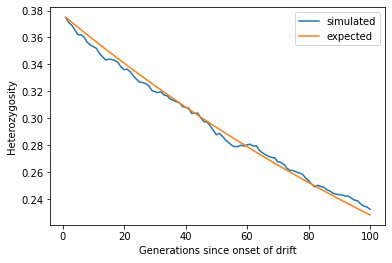

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100
p = 0.25
simlen = 100
np.random.seed(42)

def geth(freqs):
    return 2*freqs*(1.-freqs)
    
nreps = 500 
sumh = np.zeros(simlen)

for pop in range(nreps):
    freqs = [p]
    for g in range(simlen-1):
        pn = np.random.binomial(2*N, freqs[-1], 1)[0]/(2*N)
        freqs.append(pn)
    sumh += geth(np.array(freqs))
    
f, ax = plt.subplots()
expected = np.array([2*p*(1.-p)]*simlen)
t = np.array([float(i) for i in range(simlen)])
expected = expected*(1. - 1/(2*N))**t

meanh = sumh/nreps

ax.plot([i+1 for i in range(simlen)], meanh, label="simulated")
ax.plot([i+1 for i in range(simlen)], expected, label="expected")
ax.set_xlabel("Generations since onset of drift")
ax.set_ylabel("Heterozygosity")
ax.legend();

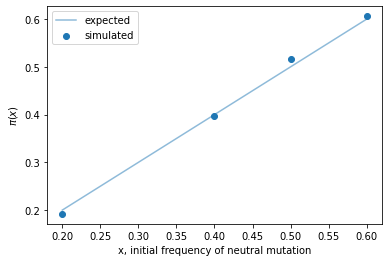

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100
p0 = [0.2, 0.4, 0.5, 0.6]
simlen = 100
np.random.seed(153247)
nreps = 500
up = []
for p in p0:
    nfixed = 0
    for r in range(nreps):
        x = p
        while x > 0 and x < 1:
            x = np.random.binomial(2*N, x, 1)[0]/(2*N)
        if x == 1.0:
            nfixed += 1
    up.append(nfixed/nreps)

f, ax = plt.subplots()
ax.scatter(p0, up, marker='o', label="simulated");
ax.plot(p0, p0, alpha=0.5, label="expected")
ax.set_xlabel("x, initial frequency of neutral mutation")
ax.set_ylabel(r'$\pi (x)$')
ax.legend();